In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

2D diffusion equation is defined as;
$$\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u }{\partial y^2} $$
Forward difference in time, central second order spatial derivatives.
$$ \frac{u_{ij}^{n+1}-u_{ij}^n}{\Delta t} = \nu\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2} + \nu\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}$$
Only one unknown so 
$$ u_{ij}^{n+1} = u_{ij}^n + \frac{\nu\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}) + \frac{\nu\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})$$

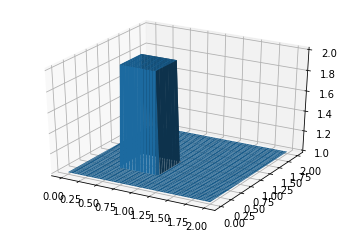

In [24]:
nx = 50
ny = 50
nt = 100
nu = .5
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx * dy / nu #Stability

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx,nt))
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1),0] = 2

fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,u[:,:,0])

In [25]:
for n in range(nt-1):
  tempu = u[:,:,n].copy()

  u[1:-1, 1:-1, n+1] = (tempu[1:-1,1:-1] + nu * dt / dx**2 * (tempu[1:-1,2:]-2*tempu[1:-1,1:-1]+tempu[1:-1,:-2]) + 
                    nu * dt / dy**2 * (tempu[2:,1:-1]-2*tempu[1:-1,1:-1]+tempu[:-2,1:-1]))
    
  u[0,:,n+1] = 1
  u[-1,:,n+1] = 1
  u[:,0,n+1] = 1
  u[0,-1,n+1] = 1

(1.0, 2.5)

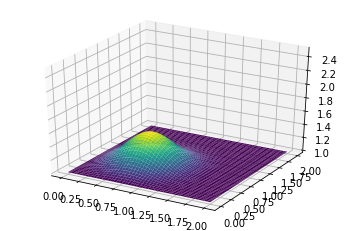

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u[:,:,-1], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)

(1.0, 2.5)

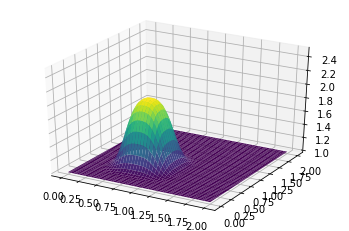

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u[:,:,14], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)